# Final Exam Second Semester 2566 - Principal Component Analysis (Red Wine Problem)

This exam problem has an objective to develop a principal component analysis to reduce the dimension of the attributes of the red wine including
1. Tartaric Acid
2. Grape Density
3. Citric Acid
4. Residual Sugar
5. Sodium Chloride	
6. Free Sulfur Dioxide	
7. Bound Sulfur Dioxide	
8. Alcohol Density

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import utils_kmean as utils
from scipy import optimize

### We start the exam by first loading the dataset.

In [15]:
# Load the dataset into the variable X 
data = np.loadtxt(r'C:\Users\panda\OneDrive\Desktop\fifaaa\Data\PCA_WineData.txt')
X = data

m = X.shape[0] # number of training examples

In [16]:
X.shape

(1599, 8)

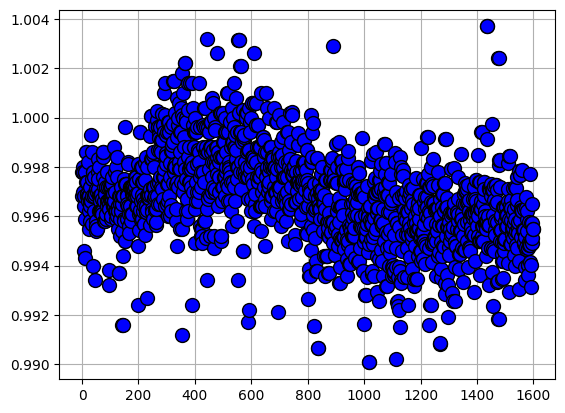

In [17]:
plt.plot(X[:,7], 'bo', ms=10, mec='k', mew=1)
plt.grid(True)
plt.show()

### Normalize data here
#### Hint: Use utils.featureNormalize

In [18]:
utils.featureNormalize

<function utils_kmean.featureNormalize(X)>

<blockquote>Normalization

In [19]:
def pca(X):
    m, n = X.shape
    U = np.zeros((n,n))
    S = np.zeros(n)
    sigma = (1/m) * np.dot(X.T,X)
    U,S,V = np.linalg.svd(sigma)
    return U, S

[[-0.52819437  0.96157585 -1.3910371  ... -0.46604672 -0.37901412
   0.55809987]
 [-0.29845406  1.96682715 -1.3910371  ...  0.87236532  0.62416796
   0.02825193]
 [-0.29845406  1.29665962 -1.18569949 ... -0.08364328  0.22897502
   0.13422152]
 ...
 [-1.15998021 -0.09952274 -0.72368987 ...  1.25476876 -0.19661738
  -0.53338688]
 [-1.38972052  0.65441573 -0.77502427 ...  1.54157134 -0.07501955
  -0.67644583]
 [-1.33228544 -1.21646863  1.02167982 ...  0.2031593  -0.13581846
  -0.66584887]]


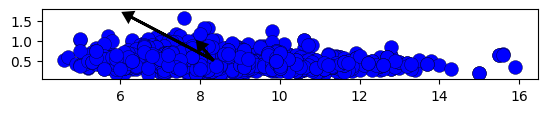

Top eigenvector: U[:, 0] = [-0.562363 0.294684]


In [ ]:
X_Norm, mu, sigma = utils.featureNormalize(X)
U, S = pca(X_Norm)
print(X_Norm)
# directions of maximum variations in the dataset.
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=0.25)

for i in range(2):
    ax.arrow(mu[0], mu[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i],
             head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.set_aspect('equal')
ax.grid(False)
plt.show()

print('Top eigenvector: U[:, 0] = [{:.6f} {:.6f}]'.format(U[0, 0], U[1, 0]))

In [21]:
X = X_Norm

<blockquote>Implement PCA

In [22]:
def pca(X):
    m, n = X.shape
    U = np.zeros((n,n))
    S = np.zeros(n)
    sigma = (1/m) * np.dot(X.T,X)
    U,S,V = np.linalg.svd(sigma)
    return U, S

In [23]:
def projectData(X, U, K):
    Z = np.zeros((X.shape[0], K))
    Z = np.dot(X,U[:,:K])
    return Z

In [24]:
#  Project the data onto K = 4 dimension
K = 1 #reduce dimension
Z = projectData(X_Norm, U, K)
print('Projection of the first example: {:.6f}'.format(Z[0, 0]))

Projection of the first example: 1.171190


In [25]:
def recoverData(Z, U, K):
    X_rec = np.zeros((Z.shape[0], U.shape[0]))
    X_rec = np.dot(Z,U[:,:K].T)
    return X_rec

Approximation of the first example: [-0.658634 0.345131]


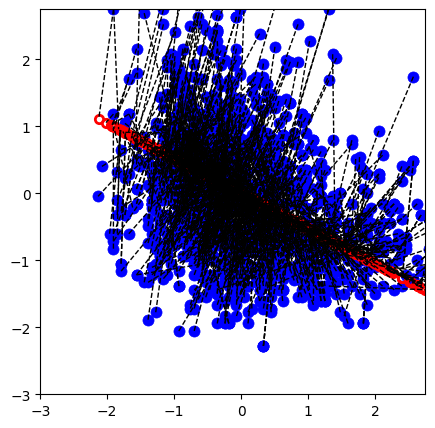

In [26]:
X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_rec[0, 0], X_rec[0, 1]))
#  Plot the normalized dataset (returned from featureNormalize)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X_Norm[:, 0], X_Norm[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
ax.grid(False)
plt.axis([-3, 2.75, -3, 2.75])

# Draw lines connecting the projected points to the original points
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_Norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

plt.show()

In [ ]:
Sigma = (1/m) * np.dot(X.T, X)
U, S, V = np.linalg.svd(Sigma)
K = len(S)
c = []
SumS = np.sum(S)
for i in range(K):
    s = np.sum(S[:i+1])
    a = s/SumS
    c.append(a)
print(c)

### End of Principal Component Analysis Problem